In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("Plus_Mffcs.csv")
df['label'] = df['label'].str.replace('<pad>', '')
df.head(1)

,folder,rms_avg,rms_max,zcr,tempo,beat_num,mfcc0,mfcc1,mfcc2,mfcc3,...,chr_std3,chr_std4,chr_std5,chr_std6,chr_std7,chr_std8,chr_std9,chr_std10,chr_std11,label
0,21 Savage - Bank Account,0.259354,0.606393,0.053069,151.999081,543,349.8974,136.948853,-34.165169,34.15247,...,0.298363,0.303634,0.301353,0.274999,0.235525,0.257558,0.28177,0.296398,0.301407,anger


### Label Encoding

In [32]:

df['label'] = df['label'].str.replace(' fear', ' love')
df['label'] = df['label'].str.replace(' surprise', ' love')

print(df['label'].unique())


[' anger' ' joy' ' sadness' ' love']


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
label_encoder = LabelEncoder()
df['emotion'] = label_encoder.fit_transform(df['label'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("\nLabel Mapping:")
print(label_mapping)


Label Mapping:
{' anger': 0, ' joy': 1, ' love': 2, ' sadness': 3}


In [35]:
df=df.drop(columns='label')
df.head(1)

,folder,rms_avg,rms_max,zcr,tempo,beat_num,mfcc0,mfcc1,mfcc2,mfcc3,...,chr_std3,chr_std4,chr_std5,chr_std6,chr_std7,chr_std8,chr_std9,chr_std10,chr_std11,emotion
0,21 Savage - Bank Account,0.259354,0.606393,0.053069,151.999081,543,349.8974,136.948853,-34.165169,34.15247,...,0.298363,0.303634,0.301353,0.274999,0.235525,0.257558,0.28177,0.296398,0.301407,0


### Machine Learning

In [36]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [37]:

y=df['emotion']
y

0      0
1      1
2      3
3      2
4      1
      ..
439    0
440    0
441    3
442    1
443    1
Name: emotion, Length: 444, dtype: int32

####  Step 1: Normalising the data

In [38]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X=df.drop(columns=['folder','emotion'])
scaler = StandardScaler()
X = scaler.fit_transform(X)
y=df['emotion']


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 2: Models

Accuracy: 0.44
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.07      0.11        15
           1       0.55      0.58      0.56        38
           2       0.00      0.00      0.00        11
           3       0.36      0.64      0.46        25

    accuracy                           0.44        89
   macro avg       0.31      0.32      0.28        89
weighted avg       0.39      0.44      0.39        89



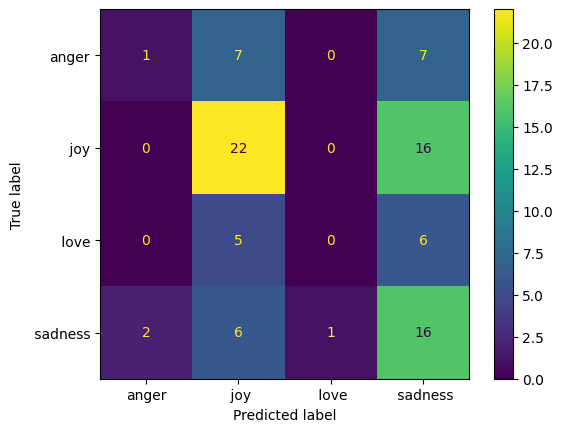

In [180]:

svm_classifier = OneVsRestClassifier(SVC(kernel='rbf', C=4.0))

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['anger', ' joy',' love', ' sadness'])
disp.plot()


Random Forest Accuracy: 0.51
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.07      0.12        15
           1       0.56      0.76      0.64        38
           2       1.00      0.09      0.17        11
           3       0.40      0.56      0.47        25

    accuracy                           0.51        89
   macro avg       0.74      0.37      0.35        89
weighted avg       0.64      0.51      0.45        89



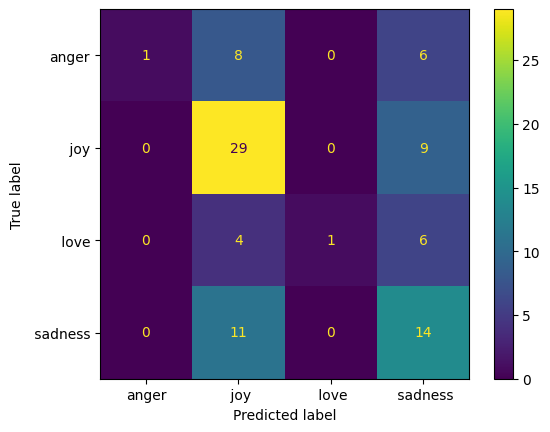

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your features and labels

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=23, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
classification_rep = classification_report(y_test, y_pred_rf)

print("Classification Report:\n", classification_rep)

cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['anger', ' joy',' love', ' sadness'])
disp.plot()

SVM Accuracy: 0.46
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.07      0.12        15
           1       0.48      0.76      0.59        38
           2       0.00      0.00      0.00        11
           3       0.39      0.44      0.42        25

    accuracy                           0.46        89
   macro avg       0.47      0.32      0.28        89
weighted avg       0.49      0.46      0.39        89



c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


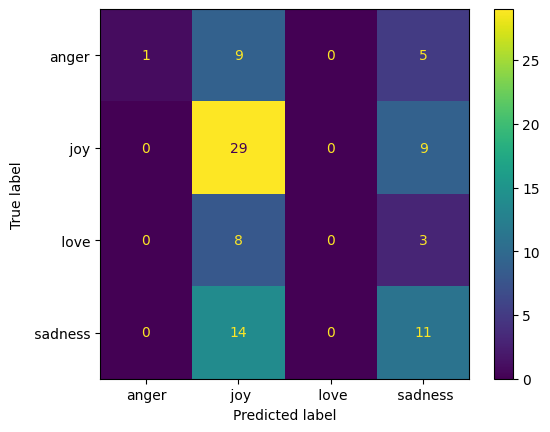

In [117]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your features and labels

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='sigmoid', C=2.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

classification_rep = classification_report(y_test, y_pred_svm)

print("Classification Report:\n", classification_rep)
cm = confusion_matrix(y_test, y_pred_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['anger', ' joy',' love', ' sadness'])
disp.plot()

Neural Network Accuracy: 0.42
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.07      0.10        15
           1       0.50      0.61      0.55        38
           2       0.00      0.00      0.00        11
           3       0.37      0.52      0.43        25

    accuracy                           0.42        89
   macro avg       0.26      0.30      0.27        89
weighted avg       0.35      0.42      0.37        89



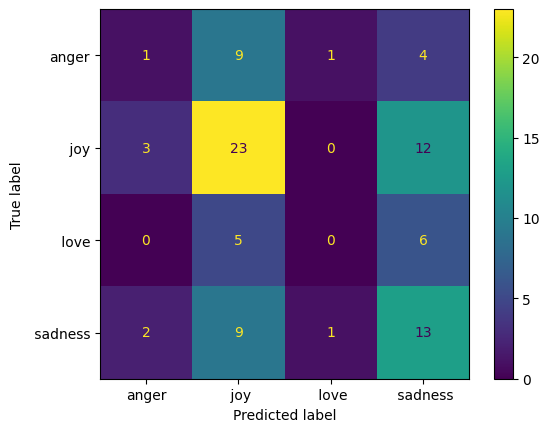

In [164]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your features and labels

# Neural Network
nn_classifier = MLPClassifier(hidden_layer_sizes=(1200,), max_iter=500, random_state=42)
nn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nn = nn_classifier.predict(X_test)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Neural Network Accuracy: {accuracy_nn:.2f}')
classification_rep = classification_report(y_test, y_pred_nn)

print("Classification Report:\n", classification_rep)

cm = confusion_matrix(y_test, y_pred_nn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['anger', ' joy',' love', ' sadness'])
disp.plot()


XGBoost Accuracy: 0.44
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.07      0.12        15
           1       0.48      0.82      0.60        38
           2       0.00      0.00      0.00        11
           3       0.30      0.28      0.29        25

    accuracy                           0.44        89
   macro avg       0.45      0.29      0.25        89
weighted avg       0.46      0.44      0.36        89



c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


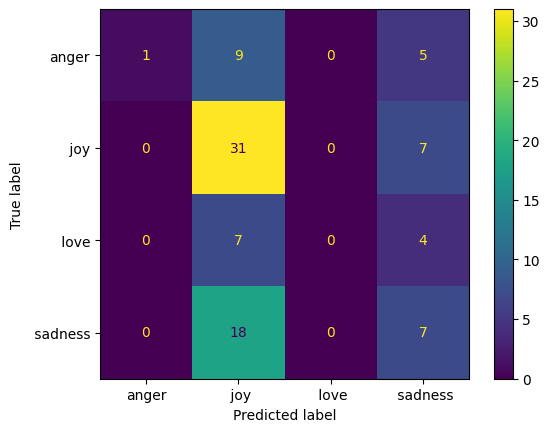

In [69]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your features and labels

# Gradient Boosting (XGBoost)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')

classification_rep = classification_report(y_test, y_pred_xgb)

print("Classification Report:\n", classification_rep)

cm = confusion_matrix(y_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['anger', ' joy',' love', ' sadness'])
disp.plot()

KNN Accuracy: 0.42
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.42      0.89      0.58        38
           2       0.00      0.00      0.00        11
           3       0.33      0.12      0.18        25

    accuracy                           0.42        89
   macro avg       0.19      0.25      0.19        89
weighted avg       0.28      0.42      0.30        89



c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


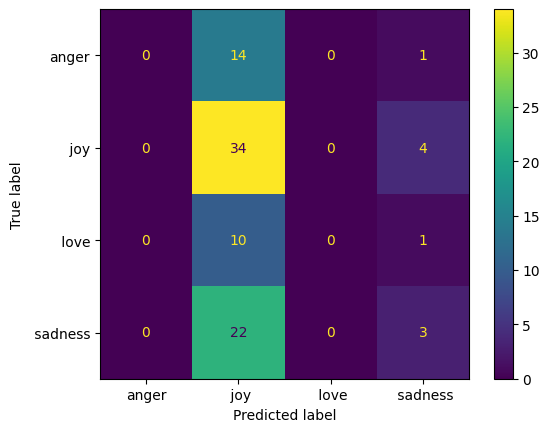

In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your features and labels

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=22,p=2,weights='distance',algorithm='kd_tree')
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')

classification_rep = classification_report(y_test, y_pred_knn)

print("Classification Report:\n", classification_rep)
cm = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['anger', ' joy',' love', ' sadness'])
disp.plot()

Accuracy: 0.39325842696629215
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.20      0.24        15
           1       0.45      0.53      0.49        38
           2       0.00      0.00      0.00        11
           3       0.38      0.48      0.42        25

    accuracy                           0.39        89
   macro avg       0.28      0.30      0.29        89
weighted avg       0.35      0.39      0.37        89



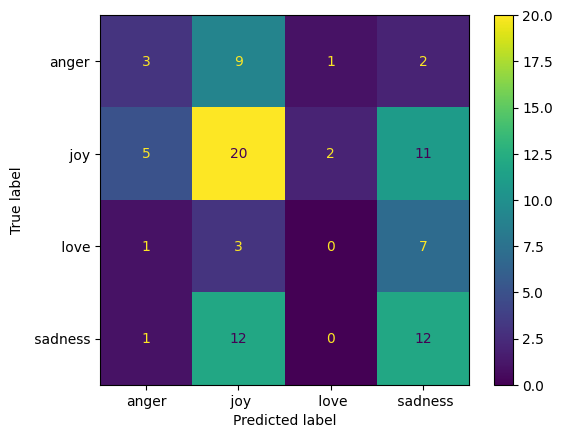

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets

# Create a logistic regression model
logreg_model = LogisticRegression(max_iter=1200,multi_class='ovr')  # Increase max_iter if needed

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['anger', ' joy',' love', ' sadness'])
disp.plot()
